In [1]:
!nvidia-smi

Sat Oct 12 18:42:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/emotions.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

In [7]:
paths = []
labels = []
for label in ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']:
  sub_path = os.path.join('/content/dataset/', label,)
  f = os.listdir(sub_path)
  paths.extend(list(map(lambda x: os.path.join(sub_path, x), f)))
  labels.extend([label] * len(f))
len(paths)

12162

In [8]:
paths[:10]

['/content/dataset/angry/KL_a05.wav',
 '/content/dataset/angry/1079_IEO_ANG_MD.wav',
 '/content/dataset/angry/1057_TIE_ANG_XX.wav',
 '/content/dataset/angry/1056_MTI_ANG_XX.wav',
 '/content/dataset/angry/03-01-05-02-01-01-19.wav',
 '/content/dataset/angry/JE_a14.wav',
 '/content/dataset/angry/OAF_dead_angry.wav',
 '/content/dataset/angry/OAF_ton_angry.wav',
 '/content/dataset/angry/1020_IEO_ANG_HI.wav',
 '/content/dataset/angry/03-01-05-02-01-01-04.wav']

In [14]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/dataset/angry/KL_a05.wav,angry
1,/content/dataset/angry/1079_IEO_ANG_MD.wav,angry
2,/content/dataset/angry/1057_TIE_ANG_XX.wav,angry
3,/content/dataset/angry/1056_MTI_ANG_XX.wav,angry
4,/content/dataset/angry/03-01-05-02-01-01-19.wav,angry


In [15]:
df['label'].value_counts()

,count
label,
angry,1923
disgust,1923
fear,1923
happy,1923
sad,1923
neutral,1895
surprise,652


In [16]:
df.drop(df[df['label'] == 'surprise'].index, inplace=True)

In [17]:
df['label'].value_counts()

,count
label,
angry,1923
disgust,1923
fear,1923
happy,1923
sad,1923
neutral,1895


In [34]:
def waveplot(data, sr, emotion):
  plt.title(emotion)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(10, 5))
  plt.title(emotion)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

In [21]:
emotions = df['label'].unique()

angry


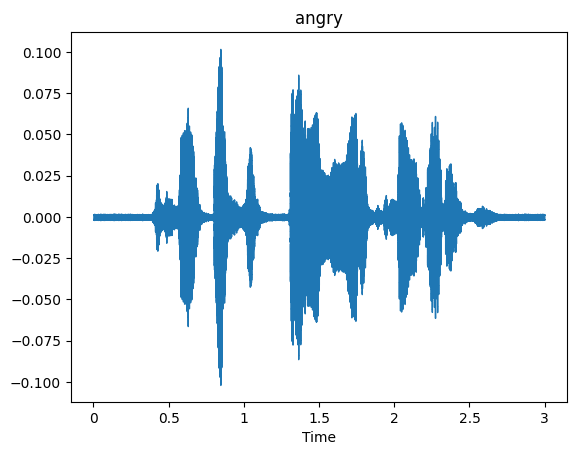

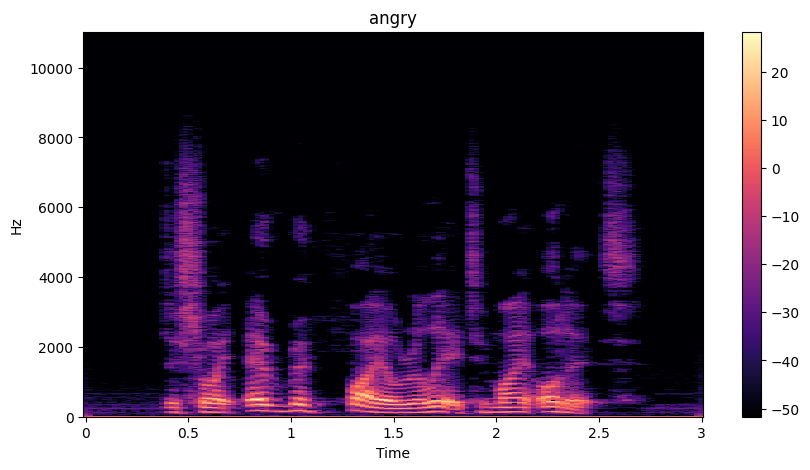

In [35]:
emotion = emotions[0]
print(emotion)
path = np.array(df['speech'][df['label']==emotion])[0]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

disgust


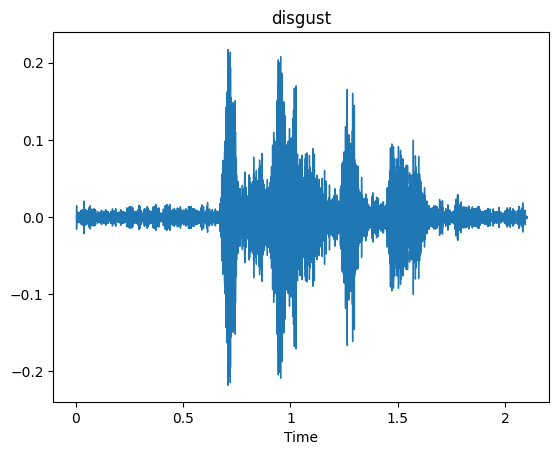

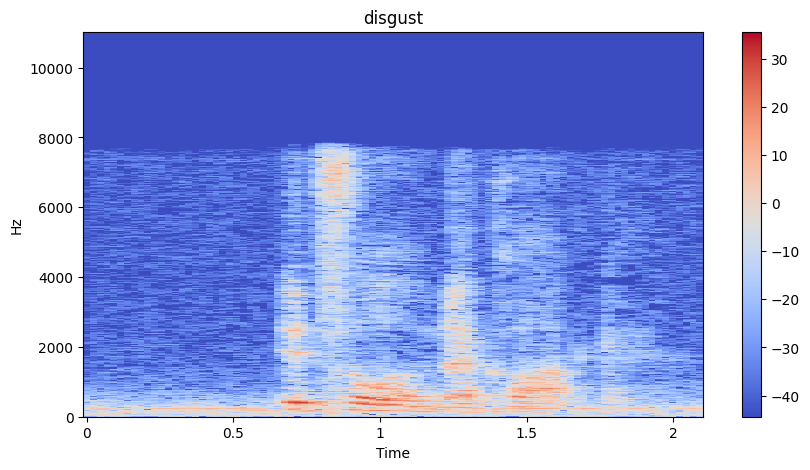

In [36]:
emotion = emotions[1]
print(emotion)
path = np.array(df['speech'][df['label']==emotion])[0]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

fear


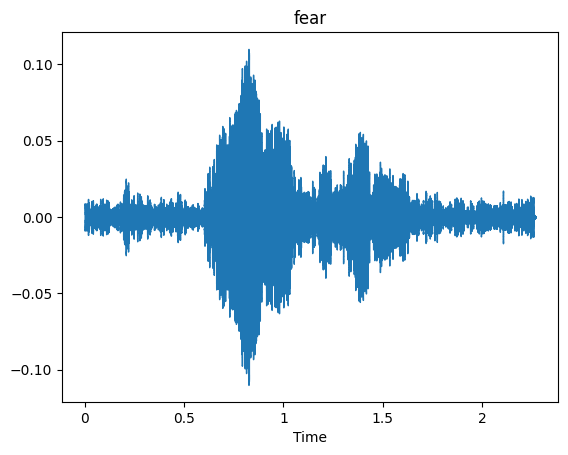

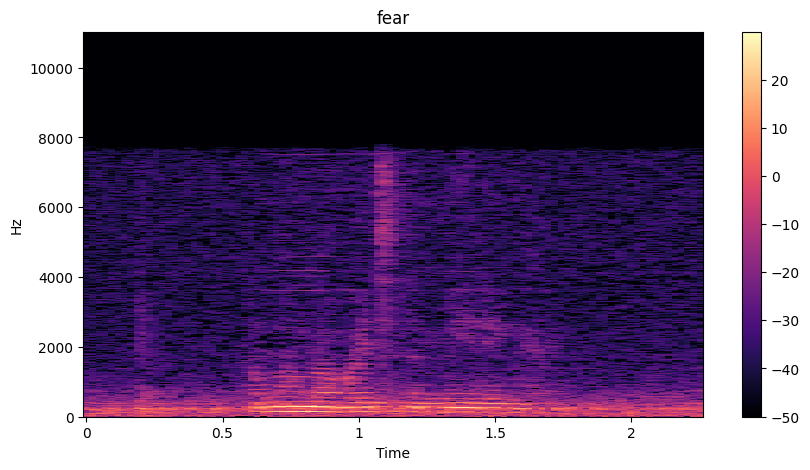

In [37]:
emotion = emotions[2]
print(emotion)
path = np.array(df['speech'][df['label']==emotion])[0]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

happy


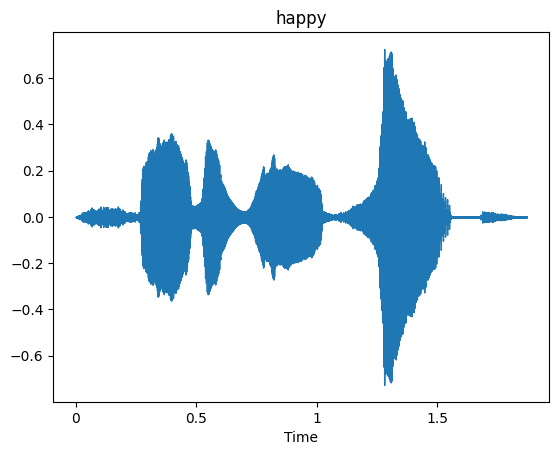

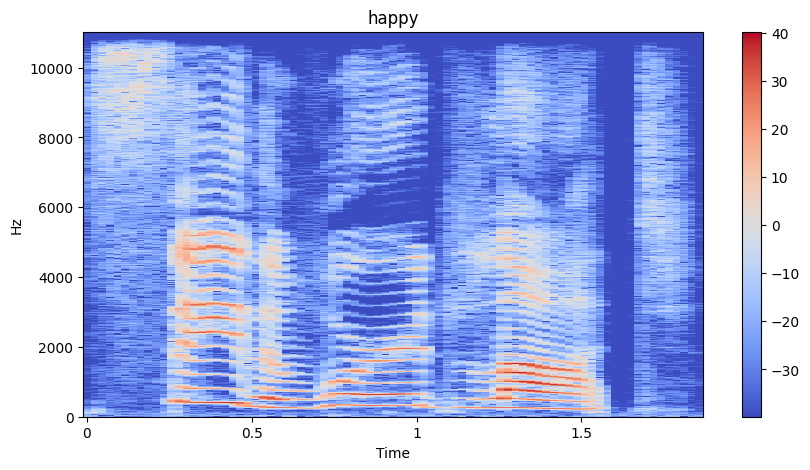

In [38]:
emotion = emotions[3]
print(emotion)
path = np.array(df['speech'][df['label']==emotion])[0]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

neutral


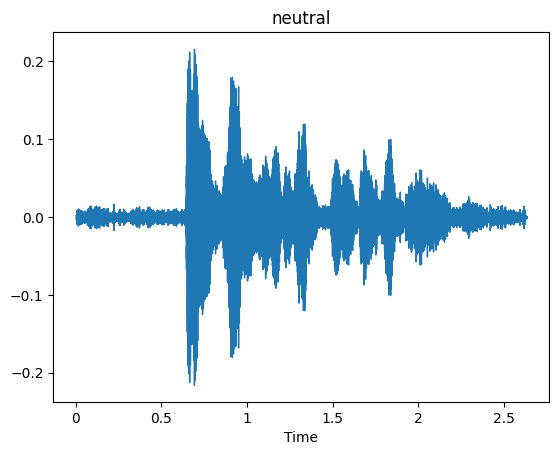

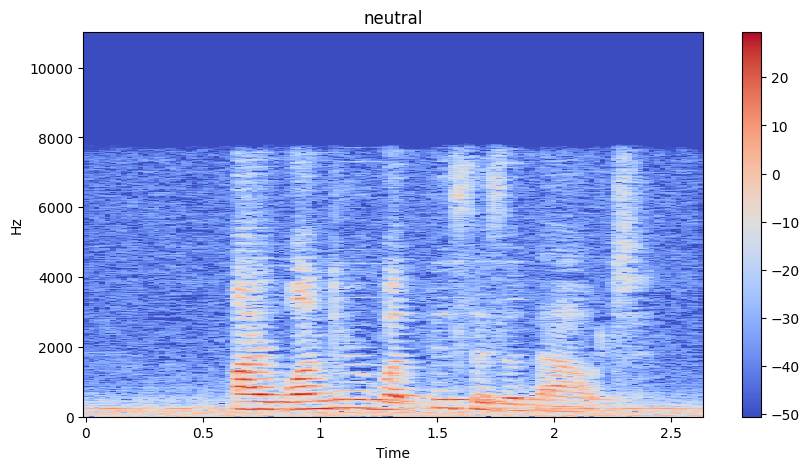

In [39]:
emotion = emotions[4]
print(emotion)
path = np.array(df['speech'][df['label']==emotion])[0]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

sad


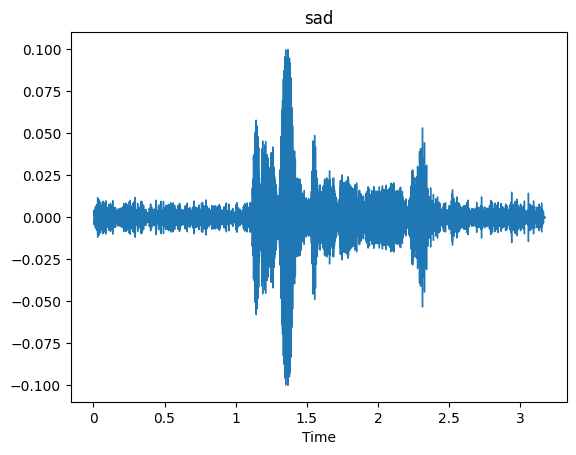

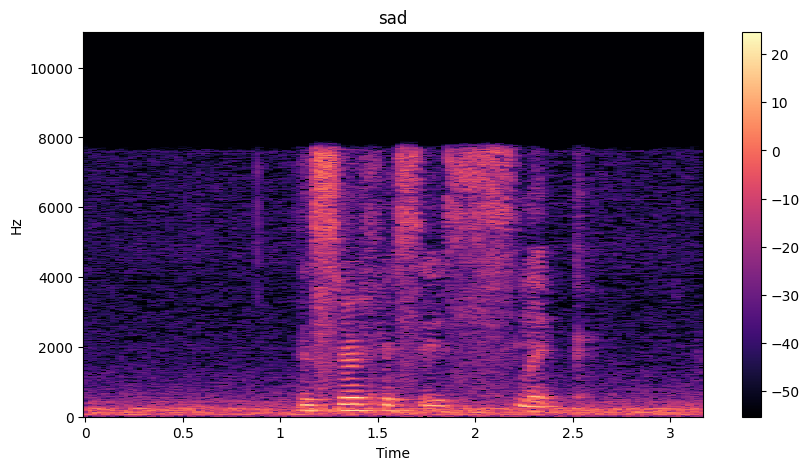

In [40]:
emotion = emotions[5]
print(emotion)
path = np.array(df['speech'][df['label']==emotion])[0]
data, sr = librosa.load(path)
waveplot(data, sr, emotion)
spectogram(data, sr, emotion)
Audio(path)

# MFCC Extraction

In [42]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
  return mfcc

In [44]:
extract_mfcc(df['speech'][0])


array([-5.4039935e+02,  1.3588931e+02,  1.6719578e+01,  2.1461205e+01,
        3.2743168e+00, -9.2861071e+00, -1.8027779e+01, -8.3454084e+00,
       -1.0997657e+01, -1.6016098e+01, -4.4688740e+00, -5.2226467e+00,
       -3.6333654e+00,  4.1637158e+00,  2.7868307e+00,  4.1123395e+00,
        4.9866672e+00, -3.0139010e+00,  1.4561548e+00,  5.6374755e+00,
       -1.6633408e+00, -5.9178519e+00, -2.8455150e-01, -1.4875464e+00,
       -4.1185927e+00,  1.7062122e+00, -9.6002162e-01, -1.0781767e+00,
        7.8037277e-02, -2.4276698e+00, -1.2970995e+00,  3.8197264e-01,
       -3.6012328e-01, -2.7527063e+00, -2.0545573e+00, -1.7941183e+00,
       -9.1522241e-01,  1.1986055e+00,  7.3836148e-01,  1.2233287e+00],
      dtype=float32)

gpu

In [43]:
import tensorflow as tf

def extract_mfcc_gpu(filename):
    y, sr = librosa.load(filename, duration=5, offset=0.5)
    y_tensor = tf.convert_to_tensor(y, dtype=tf.float32)
    mfcc = librosa.feature.mfcc(y=y_tensor.numpy(), sr=sr, n_mfcc=40)
    mfcc_tensor = tf.convert_to_tensor(mfcc, dtype=tf.float32)
    mfcc_mean = tf.reduce_mean(mfcc_tensor, axis=1)
    return mfcc_mean.numpy()

In [45]:
extract_mfcc_gpu(df['speech'][0])

array([-5.4039935e+02,  1.3588931e+02,  1.6719578e+01,  2.1461206e+01,
        3.2743170e+00, -9.2861061e+00, -1.8027779e+01, -8.3454094e+00,
       -1.0997658e+01, -1.6016096e+01, -4.4688740e+00, -5.2226462e+00,
       -3.6333654e+00,  4.1637158e+00,  2.7868311e+00,  4.1123390e+00,
        4.9866672e+00, -3.0139010e+00,  1.4561548e+00,  5.6374760e+00,
       -1.6633407e+00, -5.9178524e+00, -2.8455183e-01, -1.4875464e+00,
       -4.1185932e+00,  1.7062120e+00, -9.6002156e-01, -1.0781767e+00,
        7.8037329e-02, -2.4276700e+00, -1.2970995e+00,  3.8197267e-01,
       -3.6012340e-01, -2.7527058e+00, -2.0545576e+00, -1.7941183e+00,
       -9.1522247e-01,  1.1986055e+00,  7.3836166e-01,  1.2233289e+00],
      dtype=float32)

Extraction

In [46]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc_gpu(x))
x_mfcc

In [47]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(11510, 40)

In [49]:
x = np.expand_dims(x, -1)
x.shape

(11510, 40, 1)

Encoding labels

In [53]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [54]:
y = y.toarray()
y.shape

(11510, 6)

#LSTM Model

In [60]:
model = Sequential()

# Simpler LSTM model
model.add(LSTM(128, return_sequences=False, input_shape=(40, 1), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(6, activation='softmax'))

optimizer = Adam(learning_rate=0.0003)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 75,974 (296.77 KB)

 Trainable params: 75,590 (295.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)

e = 50
lstm_history = model.fit(x, y,
                         validation_split=0.2,
                         epochs=e,
                         batch_size=128,
                         shuffle=True,
                         callbacks=[early_stopping, reduce_lr])

In [ ]:
plt.figure(figsize=(12, 12))

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [67]:
model.save('LSTM_model.keras')